In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
def load_data(file_path, index_name):
    data = pd.read_csv(file_path, engine='python', encoding='utf-8')
    return data#data.set_index(index_name)
def print_dataset_info(dataset, key_name):
    print('%s rows of data, %s columns' % (dataset.shape[0], dataset.shape[1]) )
    print(dataset.columns)
    print('%s unique %s in the data.' % (dataset[key_name].nunique(), key_name))

### 1. Load Dataset

In [6]:
data_listings = load_data('dataset/listings.csv', '')
data_calendar_2020 = load_data('dataset/calendar.csv', '')
#data_calendar_2019 = load_data('dataset/calendar_2019.csv', '')
data_reviews = load_data('dataset/reviews.csv', '')

### 2. Dataset Exploration

In [7]:
# data_listings
print_dataset_info(data_listings, 'id')
data_listings.head(2)

8103 rows of data, 106 columns
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)
8103 unique id in the data.


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,74641,https://www.airbnb.com/rooms/74641,20200629042806,2020-06-30,黑白雙人房@南京復興站｡小巨蛋斜對面｡溫泉式浴缸｡,"私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...","你的套房裡有清爽安靜的空間,舒服的衛浴設備,無線網路Wi-fi,旅行需要洗衣服也沒問題,有洗...","私人衛浴大套房,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",none,This area is what we called Business & Residen...,...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.47
1,74643,https://www.airbnb.com/rooms/74643,20200629042806,2020-06-30,小巨蛋｡南京復興站溫馨套房,"小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...","歡迎來台北,我們的小提琴工作室就在一旁,如果有興趣,我們很樂意和客人互動! 你的套房裡有清爽...","小巨蛋對面,距南京復興站走路2分鐘｡面對7-11便利商店,旁邊就是南京微風百貨;私人衛浴套房...",none,"微風南京,台北小巨蛋｡ 南京復興捷運站,兄弟飯店,文華飯店｡",...,f,f,strict_14_with_grace_period,f,f,4,0,4,0,0.46


In [8]:
# data_reviews
print_dataset_info(data_reviews, 'listing_id')
data_reviews.head()

270244 rows of data, 6 columns
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
6308 unique listing_id in the data.


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,74641,730893,2011-11-20,933072,Yixi,3036 is a great find. The place is newly renov...
1,74641,1145534,2012-04-17,2066091,Ryota,"Good location, Number lock (24h doorway), Face..."
2,74641,3643432,2013-02-26,438952,Roy,"As described, good location, clean and comfort..."
3,74641,3810853,2013-03-17,5370009,Herman,My girlfriend and I spent 5 nights here and it...
4,74641,4226835,2013-04-20,1989618,Morgan,"Our stay in Taipei was amazing, in large part ..."


In [9]:
# data_calendar
print_dataset_info(data_calendar_2020, 'listing_id')
print('-----')
#print_dataset_info(data_calendar_2019, 'listing_id')

2958120 rows of data, 7 columns
Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
8103 unique listing_id in the data.
-----


### 3. Data Cleaning and Transformation

In [12]:
data_calendar_2020['available'] = data_calendar_2020.available.map(lambda x: 1 if x == 't' else 0)
data_calendar_2020.date = pd.to_datetime(data_calendar_2020.date)
data_calendar_2020['price'] = data_calendar_2020['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

calendar = data_calendar_2020.groupby('date')['available', 'price'].mean().reset_index()
calendar.rename(columns={'price': 'average_price', 'available': 'vacancy'}, inplace=True)

calendar['occupancy'] = (1 - calendar['vacancy']) * 100
calendar['dayofweek'] = calendar.date.dt.day_name()
calendar['month'] = calendar.date.dt.month

In [15]:
data_reviews.date = pd.to_datetime(data_reviews.date)
data_reviews['year_month'] = pd.to_datetime(data_reviews.date)

reviews = data_reviews.groupby(data_reviews['year_month'].dt.to_period('M'))['listing_id'].count()
reviews = reviews.resample('M').asfreq().fillna(0)

## Q1: 疫情對市場上租屋需求的影響
### (1) 綜觀2011-2020/06的review次數，趨勢的改變狀況？
前題假設：reviews次數可代表booking次數，Airbnb官方稱有50%的房客會review

Text(0.5, 1.0, ' reviews_count by year_month')

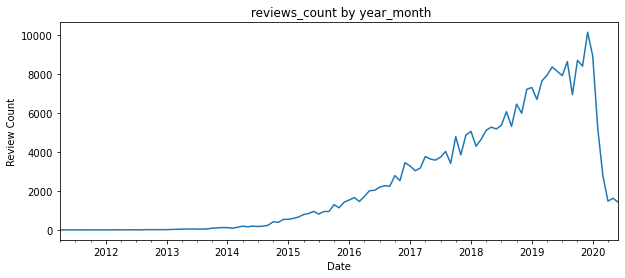

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4), sharey=True)
df_index = reviews.index
reviews.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Review Count')
ax.set_title(" {} by {}".format('reviews_count', 'year_month', fontsize=18, fontweight='bold'))

### (2) 哪一個行政區的需求下降最多？

In [36]:
data_listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
萬華區,1710
大安區,1297
中正區,1296
中山區,1042
信義區,809
大同區,585
松山區,422
士林區,276
北投區,218
